In [1]:
!pip3 install torch torchvision numpy matplotlib

In [72]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as t
import numpy as np
import matplotlib.pyplot as plt

# Model


Try to create your own model achieving >95% accuracy. Here are some useful links:
* [module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html)
* [linear layer](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)
* [activation](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity)
* [flatten](https://pytorch.org/docs/stable/generated/torch.flatten.html)

In [85]:
model = ...

In [74]:
EPOCHS = 3
BATCH_SIZE = 32
LR = 3e-3

mnist_train_dataset = torchvision.datasets.MNIST(root='mnist', train=True, download=True, transform = t.ToTensor())
mnist_test_dataset = torchvision.datasets.MNIST(root='mnist', train=False, download=True, transform = t.ToTensor())
train_loader = torch.utils.data.DataLoader(mnist_train_dataset, shuffle=True, batch_size=BATCH_SIZE)
test_loader = torch.utils.data.DataLoader(mnist_test_dataset, batch_size=BATCH_SIZE)


33.1%

100.0%


Extracting mnist/MNIST/raw/train-images-idx3-ubyte.gz to mnist/MNIST/raw



100.0%
100.0%

Extracting mnist/MNIST/raw/train-labels-idx1-ubyte.gz to mnist/MNIST/raw

Extracting mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist/MNIST/raw



100.0%



Extracting mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist/MNIST/raw



1.0%

100.0%


Extracting f_mnist/FashionMNIST/raw/train-images-idx3-ubyte.gz to f_mnist/FashionMNIST/raw



100.0%


Extracting f_mnist/FashionMNIST/raw/train-labels-idx1-ubyte.gz to f_mnist/FashionMNIST/raw



100.0%


Extracting f_mnist/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to f_mnist/FashionMNIST/raw



100.0%

Extracting f_mnist/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to f_mnist/FashionMNIST/raw



### evaluation function for our model

In [ ]:
def eval(model, device=torch.device('cpu'), data_loader = test_loader):
    model.eval()
    with torch.no_grad():
        corr = 0
        tot = 0
        for x, y in data_loader:
            pass
        return corr/tot*100

### training function for our model

In [ ]:
def train(model, device=torch.device('cpu'), data_loader = train_loader, eval_data_loader = test_loader):
    criterion = nn.CrossEntropyLoss()
    optim = torch.optim.Adam(model.parameters(), lr=LR)
    precision = []
    losses = []
    model = model.to(device)
    for epoch in range(3):
        for i, (image, label) in enumerate(data_loader):
            pass
            if (i+1) % 200 == 0:
                print (f'Epochs [{epoch+1}], Step[{i+1}], Losses: {loss.item():.4f}     ', end='\r')
            if (i+1) % 200 == 0:
                precision.append(eval(model, device, eval_data_loader))
            if (i+1) % 20 == 0:
                losses.append(loss.item())

    # plot training progress
    figure = plt.figure()
    figure.add_subplot(2, 2, 1)
    plt.plot(precision)
    plt.xlabel('precision')
    figure.add_subplot(2, 2, 2)
    plt.plot(losses)
    plt.xlabel('loss')
    plt.show()
    return precision, losses

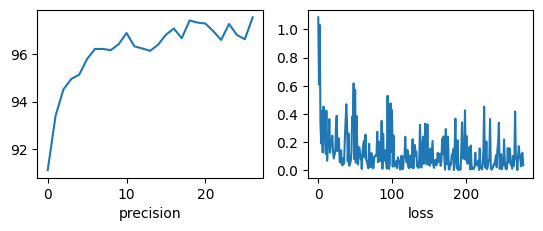

In [87]:
precision, losses = train(model, torch.device('mps'))

## Too easy?
### Let's see if you can achieve 98% accuracy (hint: [convolutional layers](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html))

In [98]:
cnn_model = ...

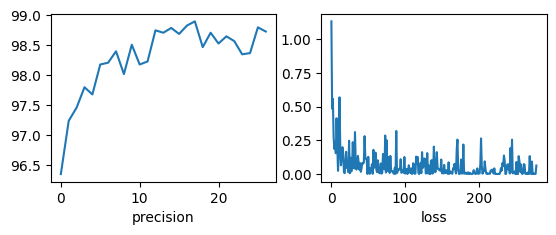

In [99]:
precision, losses = train(cnn_model, torch.device('mps'))

In [101]:
precision[-1]

98.72999999999999

## Still not hard enough?
### Try to achieve similar accuracy on a more difficult dataset FashionMNIST
![Alt text](fashion-mnist.png)

In [102]:
fashion_mnist_train_dataset = torchvision.datasets.FashionMNIST(root='f_mnist', train=True, download=True, transform = t.ToTensor())
fashion_mnist_test_dataset = torchvision.datasets.FashionMNIST(root='f_mnist', train=False, download=True, transform = t.ToTensor())
fashion_train_loader = torch.utils.data.DataLoader(fashion_mnist_train_dataset, shuffle=True, batch_size=BATCH_SIZE)
fashion_test_loader = torch.utils.data.DataLoader(fashion_mnist_test_dataset, batch_size=BATCH_SIZE)

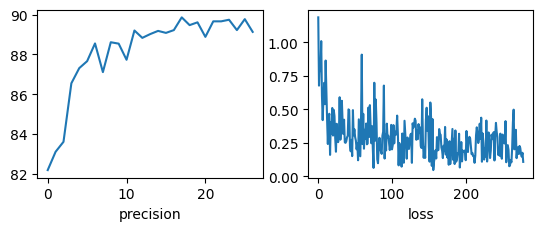

In [103]:
precision, losses = train(cnn_model, torch.device('mps'), eval_data_loader= fashion_test_loader, data_loader= fashion_train_loader)

# Model sensitivity to small changes

Since we trained our model on just correctly oriented images even small rotation can cause significant drop in accuracy.

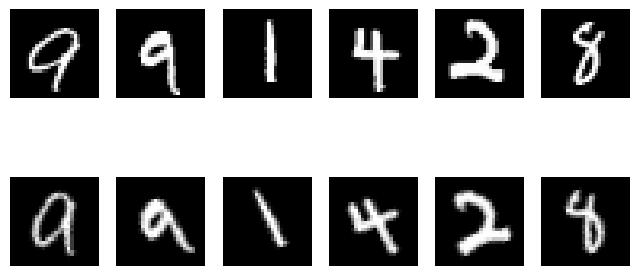

In [466]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 6, 1
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(mnist_test_dataset), size=(1,)).item()
    img, label = mnist_test_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
    figure.add_subplot(rows*2, cols, i+cols)
    plt.axis("off")
    plt.imshow(t.functional.rotate(img, 25, interpolation=t.functional.InterpolationMode.BILINEAR).squeeze(), cmap="gray")

plt.show()

## Even for small rotation our accuracy decreases significantly

In [ ]:
def test_rotated(model, angle = 25):
  model = model.cpu().eval()
  total = len(test_loader)
  corr_rotated = 0
  corr = 0
  for x,y in test_loader:
    rotated = t.functional.rotate(x, angle, interpolation=t.functional.InterpolationMode.BILINEAR)
    total += y.size(0)
    corr_rotated += (torch.argmax(model(rotated), dim=1) == y).sum().item()
    corr += (torch.argmax(model(x), dim=1) == y).sum().item()
  return corr/total, corr_rotated/total

In [ ]:
test_rotated(model, -25)

# How can we remedy this?
We can add rotation to our training dataset, something called data augmentation
Try [data augmentation](https://pytorch.org/vision/main/transforms.html)

In [494]:
transforms = t.Compose([
    ...
    t.ToTensor(),
])

mnist_train_dataset_aug = torchvision.datasets.MNIST(root='mnist', train=True, download=True, transform = transforms)
mnist_test_dataset_aug = torchvision.datasets.MNIST(root='mnist', train=False, download=True, transform = t.ToTensor())
train_loader_aug = torch.utils.data.DataLoader(mnist_train_dataset_aug, shuffle=True, batch_size=BATCH_SIZE)
test_loader_aug = torch.utils.data.DataLoader(mnist_test_dataset, batch_size=BATCH_SIZE)

In [ ]:
train(model, device=torch.device('mps'), data_loader = train_loader_aug)

In [496]:
test_rotated(model, 30)

(0.9555900319984486, 0.9346455929409483)

# Export and save our trained model

In [ ]:
torch.save(model.state_dict(), 'mnist.pth')